# Breast Cancer Prediction
## Imports

In [4]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

## Data Preparation

In [5]:
cancer = load_breast_cancer()
xTrain, xTest, yTrain, yTest = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

## K-Neighbor Model Training

In [6]:
accuracy = []

# try nNeighbors from 1 to 10
neighborsSettings = range(1, 11)

for nNeighbors in neighborsSettings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=nNeighbors)
    clf.fit(xTrain, yTrain)
    
    # record accuracy
    accuracy.append([nNeighbors, clf.score(xTrain, yTrain), clf.score(xTest, yTest)])    

## Evaluation

,Neighbors,Training Accuracy,Test Accuracy
0,1,1.00,0.90
1,2,0.98,0.89
2,3,0.96,0.92
3,4,0.96,0.92
4,5,0.95,0.92
5,6,0.95,0.94
6,7,0.94,0.93
7,8,0.94,0.93
8,9,0.93,0.92
9,10,0.94,0.92


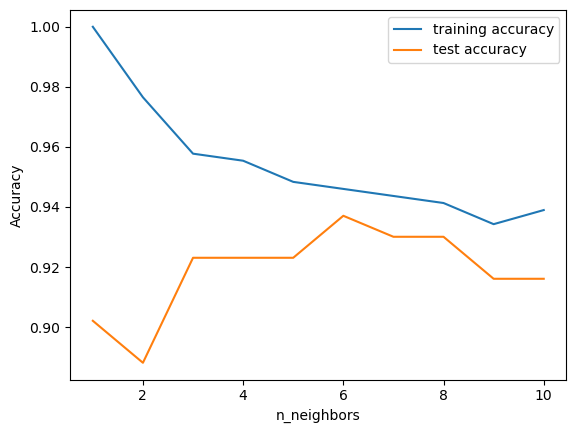

In [10]:
training_accuracy = []
test_accuracy = []

accuracy_dataframe = pd.DataFrame(accuracy, columns=['Neighbors', 'Training Accuracy', 'Test Accuracy'])
pd.options.display.float_format = '{:,.2f}'.format
display (accuracy_dataframe)

for i in range(len(accuracy)):
    training_accuracy.append(accuracy[i][1])
    test_accuracy.append(accuracy[i][2])
    
plt.plot(neighborsSettings, training_accuracy, label="training accuracy")
plt.plot(neighborsSettings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Visualisation

In [11]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

bc_dataframe = pd.DataFrame(xTrain, columns=cancer.feature_names)
display(bc_dataframe)

Sample counts per class:
 {'malignant': 212, 'benign': 357}


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.87,20.70,89.77,584.80,0.10,0.10,0.04,0.02,0.16,0.07,...,15.05,24.75,99.17,688.60,0.13,0.20,0.14,0.07,0.22,0.08
1,17.57,15.05,115.00,955.10,0.10,0.12,0.10,0.08,0.17,0.06,...,20.01,19.52,134.90,"1,227.00",0.13,0.28,0.25,0.15,0.28,0.08
2,13.30,21.57,85.24,546.10,0.09,0.06,0.03,0.02,0.18,0.06,...,14.20,29.20,92.94,621.20,0.11,0.17,0.12,0.06,0.26,0.07
3,10.48,19.86,66.72,337.70,0.11,0.06,0.05,0.03,0.17,0.06,...,11.48,29.46,73.68,402.80,0.15,0.10,0.12,0.07,0.29,0.08
4,11.94,20.76,77.87,441.00,0.09,0.10,0.07,0.04,0.16,0.07,...,13.24,27.29,92.20,546.10,0.11,0.28,0.24,0.12,0.25,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,12.45,16.41,82.85,476.70,0.10,0.15,0.15,0.05,0.21,0.07,...,13.78,21.03,97.82,580.60,0.12,0.41,0.49,0.13,0.32,0.10
422,9.00,14.40,56.36,246.30,0.07,0.03,0.00,0.00,0.18,0.07,...,9.70,20.07,60.90,285.50,0.10,0.05,0.01,0.01,0.30,0.08
423,14.58,21.53,97.41,644.80,0.11,0.19,0.14,0.09,0.23,0.07,...,17.62,33.21,122.40,896.90,0.15,0.66,0.55,0.27,0.43,0.13
424,13.65,13.16,87.88,568.90,0.10,0.09,0.04,0.03,0.14,0.06,...,15.34,16.35,99.71,706.20,0.13,0.25,0.18,0.08,0.24,0.09


## Logistic Regression Model Training

In [12]:
logreg = LogisticRegression(max_iter=10000).fit(xTrain, yTrain)
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(xTrain, yTrain)
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(xTrain, yTrain)

## Evaluation

C=1 - Training set score: 0.979
C=1 - Test set score: 0.944
C=100 - Training set score: 0.984
C=100 - Test set score: 0.965
C=0.01 - Training set score: 0.960
C=0.01 - Test set score: 0.937


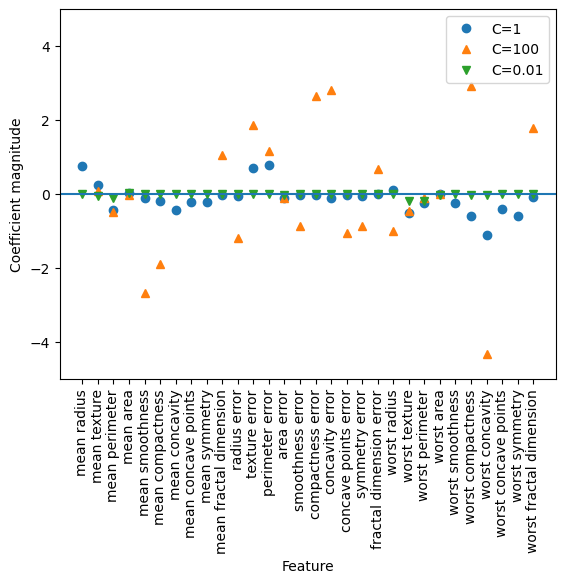

In [13]:
print("C=1 - Training set score: {:.3f}".format(logreg.score(xTrain, yTrain)))
print("C=1 - Test set score: {:.3f}".format(logreg.score(xTest, yTest)))

print("C=100 - Training set score: {:.3f}".format(logreg100.score(xTrain, yTrain)))
print("C=100 - Test set score: {:.3f}".format(logreg100.score(xTest, yTest)))

print("C=0.01 - Training set score: {:.3f}".format(logreg001.score(xTrain, yTrain)))
print("C=0.01 - Test set score: {:.3f}".format(logreg001.score(xTest, yTest)))

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [14]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## Decision Tree Model Training

In [15]:
tree = DecisionTreeClassifier(random_state=0)
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0)

tree.fit(xTrain, yTrain)
tree4.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=4, random_state=0)

## Evaluation

Accuracy on training set: 1.000
Accuracy on test set: 0.895
Tree depth=4 - Accuracy on training set: 0.988
Tree depth=4 - Accuracy on test set: 0.902


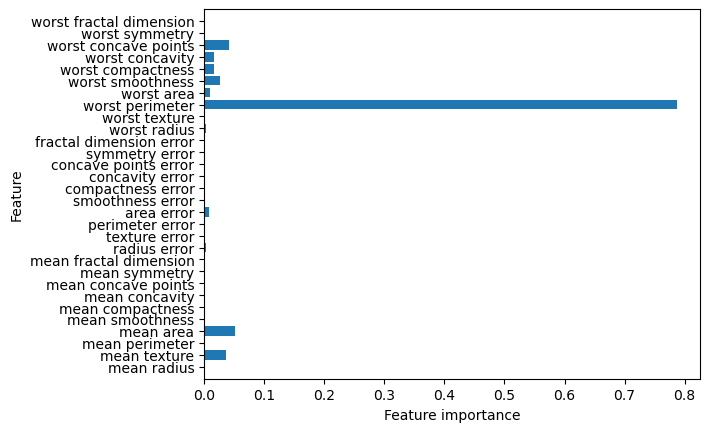

In [16]:
print("Accuracy on training set: {:.3f}".format(tree.score(xTrain, yTrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(xTest, yTest)))

print("Tree depth=4 - Accuracy on training set: {:.3f}".format(tree4.score(xTrain, yTrain)))
print("Tree depth=4 - Accuracy on test set: {:.3f}".format(tree4.score(xTest, yTest)))

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

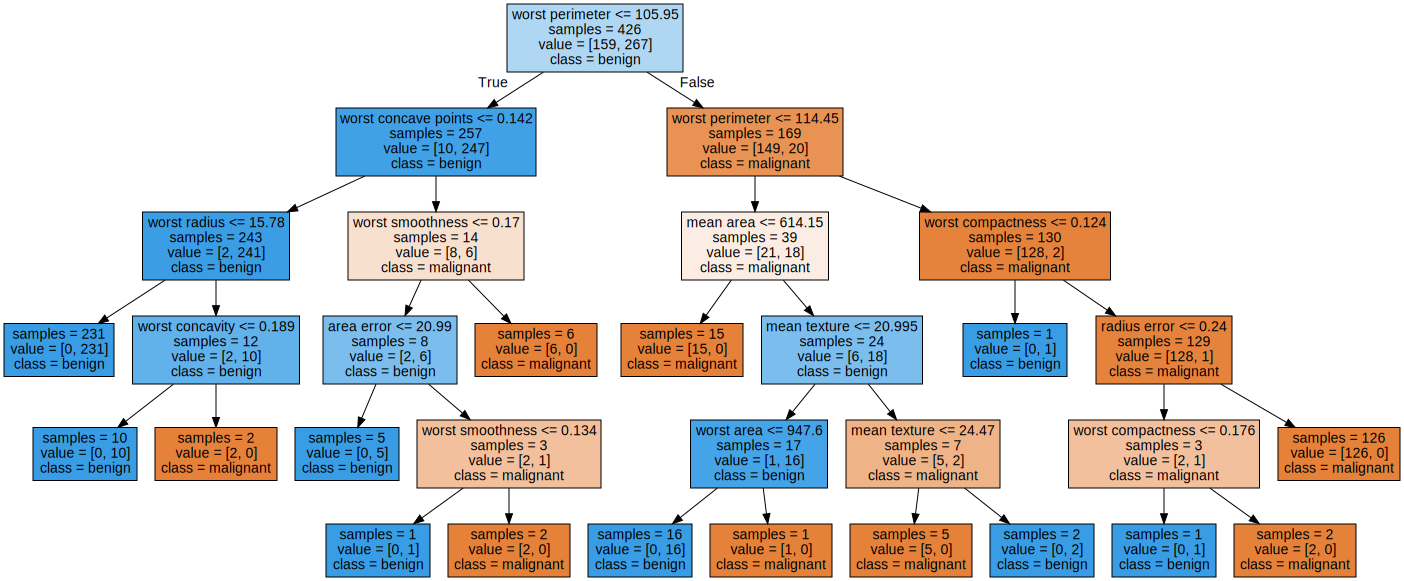

In [21]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)


with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))